# Avaliação 1


```{admonition} Instruções
:class: tip

- Os exercícios abaixo devem ser resolvidos e entregues em um arquivo único em formato PDF.
- Interpretações e respostas devem ser feitas à mão livre e escaneadas.
- Insira os códigos que utilizar como anexo no PDF.
```

**Exercício 1 (1 ponto):** Defina os seguintes termos:

a.  Visualização de dados.

É uma forma de apresentar informações utilizando recursos gráficos com o objetivo de facilitar o entendimento do conteúdo, auxiliar no reconhecimento de padrões e/ou destacar aspectos de um conjunto de dados.

Os recursos a serem utilizados variam conforme a mídia em que a visualização é construída, podendo incluir elementos de interatividade como filtros e animações que ajudam a destacar comportamentos e variáveis de interesse.

b. Cores complementares.

São o conjuto de cores combinadas com seus pares opostos na roda de cores. Exemplos:
- Vermelho e verde
- Laranja e azul

c. Cores análogas.

São o conjunto de cores combinadas com cores adjacentes na roda de cores. Exemplos:
- Vermelho e laranja
- Azul e roxo

d. Excelência Gráfica em Visualização.

É a capacidade de informar o leitor de forma simples e direta, comprimindo informações em diferentes dimensões sem fazer com que a visualização fique poluída. A velocidade com que podemos entender qual o conteúdo e a facilidade em identificar padrões podem ser medidas de excelência.

![Gráfico](./imagens/avaliacao1_exercicio1_resolucao.jpg)

**Exercício 2 (1,5 pontos):** Interprete o gráfico abaixo

![Gráfico](./imagens/avaliacao1_exercicio2_grafico.PNG)

O gráfico mostra a distribuição do tempo gasto em 13 atividades por um casal, categorizando cada realização de atividade em função de quem a faz: esposa, alternado, esposo ou juntos.

A espessura de cada barra vertical mostra o tempo gasto em cada atividade de forma comparativa. Por exemplo, a barra L.Roupas é mais espessa que a barra Jantar, logo a atividade lavar roupas toma mais tempo do que preparar o jantar.

A altura de cada barra por categoria mostra a proporção de tempo gasto com certa atividade. Por exemplo, a limpeza é normalmente feita pela esposa ou juntos, poucas vezes de forma alternada e raramente feita exclusivamente pelo esposo.

Há duas atividades que não são feitas exclusivamente pela esposa: reparos e feriados. O recurso visual escolhido foi tracejar a posição onde veríamos o tempo gasto pela esposa, assim ainda há a divisão em 4 categorias sem que haja altura para o tempo gasto pela esposa.

É possível concluir que a esposa gasta muito mais tempo em afazeres domésticos. Já o tempo gasto com reparos é majoritariamente ocupado pelo esposo. Nas demais tarefas há um certo equilíbrio, por vezes pendendo para a esposa como compras ou para o esposo como em dirigir.

![Gráfico](./imagens/avaliacao1_exercicio2_resolucao.jpg)

**Exercício 3 (1,5 ponto):** 1. Escolha uma visualização não vista em aula (site, imagem, dashborad, livro, revista, dinâmica ou não) e comente os seguintes aspectos:

a. Interprete-a com base no contexto;

b. Os pontos positivos e negativos da visualização;

c. Detalhes da ferramenta utilizada.

**Exercício 4 (3,0 pontos):** Crie um conjunto de dados sobre as 399 cidades do Paraná, relativo a qualquer temática (estatísticas por município sobre Saúde, Economia, Educação, Covid-19 etc) e com no mínimo 5 variáveis. Crie gráficos informativos sobre esse conjunto de dados. Não é necessário criar mapas. Algumas fontes de dados possíveis: localizasus.saude.gov.br, www.ipea.gov.br, cidades.ibge.gov.br, www.inep.gov.br, www.atlasbrasil.org.br

**Mercado de Trabalho no Paraná durante a pandemia (Março/20 à Agosto/21)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# importa pop, pib e cria dataframe cidades com os 2
populacao_estimada = pd.read_csv('./dados/populacao_estimada.csv', delimiter=';')
pib = pd.read_csv('./dados/pib.csv')
cidades = pd.merge(populacao_estimada, pib, on='Cidade')

# importa desligamentos e admissoes do caged, cria linha para Total e dataframe saldo_caged
desligamentos_caged = pd.read_csv('./dados/desligamentos_caged.csv', delimiter=';')
desligamentos_caged.loc["Total"] = desligamentos_caged.sum(numeric_only=True)
admissoes_caged = pd.read_csv('./dados/admissoes_caged.csv')
admissoes_caged.loc["Total"] = admissoes_caged.sum(numeric_only=True)
caged_colunas_meses = admissoes_caged.columns.values[3:]
saldo_caged = admissoes_caged.copy()
for coluna in caged_colunas_meses:
    saldo_caged[coluna] -= desligamentos_caged[coluna]

# Dados Caged Ajustado a PIB e população
faixas_populacao = [p * 1000 for p in [0, 10, 100, 500, 1000, 10000]]
faixas_pib_per_capita = [0, 20, 40, 60, 100, 1000]
cidades_completo = pd.merge(saldo_caged, cidades, on='Cidade')
cidades_completo['Tamanho'] = pd.cut(cidades_completo.Populacao, bins=faixas_populacao, labels=['Pequena', 'Pequena_Media', 'Media', 'Media_Grande', 'Grande'])
cidades_completo['Pib_per_capita'] = pd.cut(cidades_completo.PIB/cidades_completo.Populacao, bins=faixas_pib_per_capita, labels=['Pobre', 'Pobre_Media', 'Media', 'Media_Rica', 'Rica'])
cidades_completo['Saldo'] = cidades_completo[caged_colunas_meses].sum(axis=1)
cidades_completo['Saldo_per_capita'] = cidades_completo.Saldo/cidades_completo.Populacao

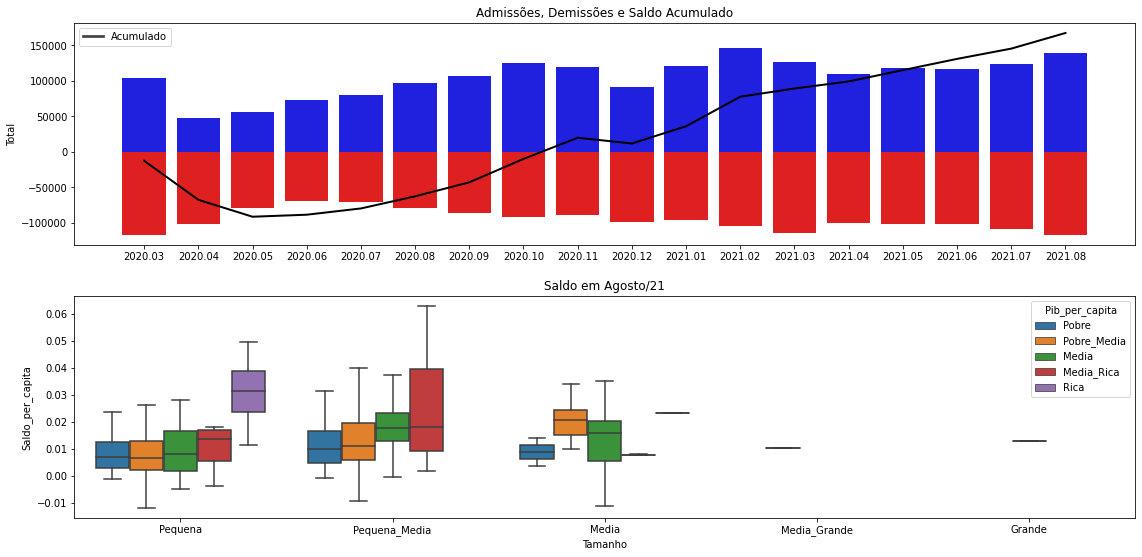

In [6]:
# Dados Caged
# Cria figura e eixos
caged_fig, (caged_ax, saldo_categorias_ax) = plt.subplots(2)
caged_fig.set_size_inches(16, 8)
plt.tight_layout(pad=3)

# Configura gráficos
caged_ax.set_title('Admissões, Demissões e Saldo Acumulado')
sns.barplot(
    ax=caged_ax,
    x=caged_colunas_meses,
    y=admissoes_caged.loc['Total', caged_colunas_meses],
    color='blue')
sns.barplot(
    ax=caged_ax,
    x=caged_colunas_meses,
    y=desligamentos_caged.loc['Total', caged_colunas_meses] * -1,
    color='red')
sns.lineplot(
    ax=caged_ax,
    x=caged_colunas_meses,
    y=saldo_caged.loc['Total', caged_colunas_meses].cumsum(),
    color="black",
    linewidth=2);
caged_ax.legend(labels=['Acumulado']);

saldo_categorias_ax.set_title("Saldo em Agosto/21")
sns.boxplot(
    ax=saldo_categorias_ax,
    x ='Tamanho',
    y ='Saldo_per_capita',
    hue='Pib_per_capita',
    data=cidades_completo,
    showfliers = False);

**Exercício 5 (3,0 pontos):** Reconstrua os gráficos abaixo alterando a paleta de cores.

a. $sen(x)$ e $cos(x)$

![Sen e Cos](./imagens/avaliacao1_exercicio5a_grafico.PNG)

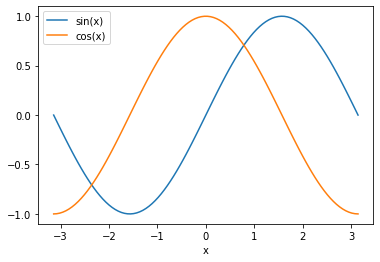

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

x = np.linspace(-np.pi, np.pi, 100)
dados = pd.DataFrame({'sin(x)': np.sin(x), 'cos(x)': np.cos(x)}, x)

plot = sns.lineplot(data=dados, dashes=False)
plot.set_yticks(np.linspace(-1, 1, 5))
plot.set_xlabel('x');

b. $z = sen(x) + cos(y)$

![Sen+Cos](./imagens/avaliacao1_exercicio5b_grafico.PNG)

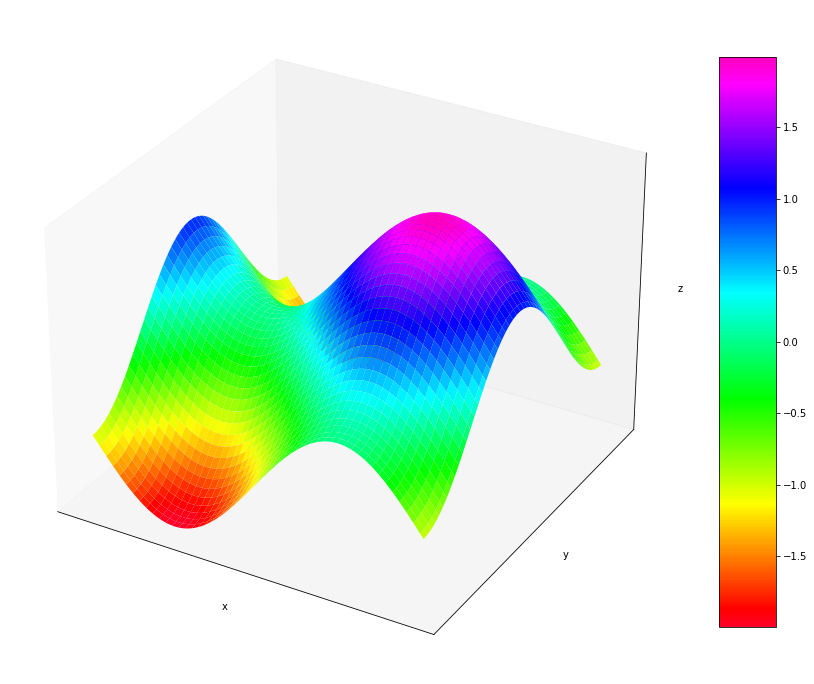

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

espaco = np.linspace(-np.pi, np.pi, 100)
x,y = np.meshgrid(espaco, espaco)
z = np.sin(x) + np.cos(y)

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.grid(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

grafico = ax.plot_surface(x, y, z, cmap=plt.cm.gist_rainbow)
legenda_cores = fig.colorbar(grafico, shrink=0.7, aspect=10)

plt.show();

c. “Rolo suiço”

![RoloSuiço](./imagens/avaliacao1_exercicio5c_grafico.PNG)

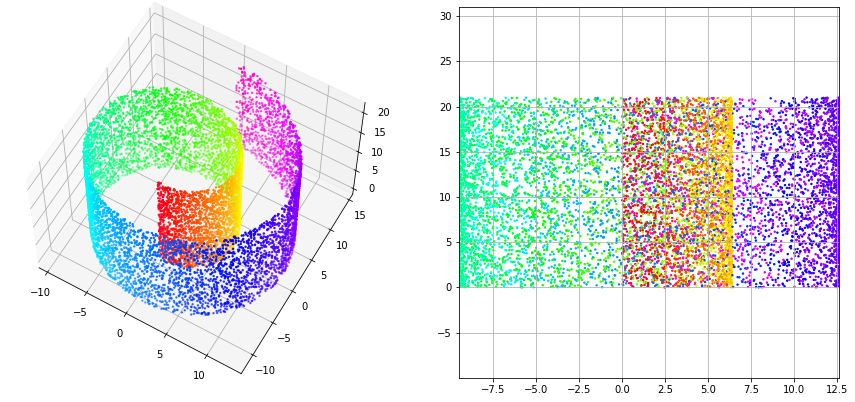

In [5]:
from sklearn import datasets

X, cor = datasets.make_swiss_roll(n_samples=10000)

fig = plt.figure(figsize=(15,15))

ax_3d = fig.add_subplot(2, 2, 1, projection="3d")
ax_3d.scatter(X[:, 0], X[:, 2], X[:, 1], s=2, c=cor, cmap=plt.cm.gist_rainbow)
ax_3d.view_init(60)

ax_2d = fig.add_subplot(2, 2, 2)
ax_2d.scatter(X[:, 0], X[:, 1], s=2, c=cor, cmap=plt.cm.gist_rainbow)
ax_2d.grid(True)
ax_2d.set_xlim( np.min(X[:, 0]),  np.max(X[:, 0]))
ax_2d.set_ylim( np.min(X[:, 1]) - 10,  np.max(X[:, 1]) + 10)

plt.show();